In [96]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report

In [66]:
df=pd.read_csv(r"C:\Users\safreena\Downloads\Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [67]:
df['Taxable.Income'] = pd.cut(df['Taxable.Income'], bins=[0,30000, np.inf], labels=['Risky', 'Good'])


In [68]:
df['Taxable.Income']

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [69]:
#converting categorical column into numerical 
df = pd.get_dummies(df, columns=['Undergrad', 'Marital.Status', 'Urban'])


In [70]:
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,Good,50047,10,1,0,0,0,1,0,1
1,Good,134075,18,0,1,1,0,0,0,1
2,Good,160205,30,1,0,0,1,0,0,1
3,Good,193264,15,0,1,0,0,1,0,1
4,Good,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,Good,39492,7,0,1,1,0,0,0,1
596,Good,55369,2,0,1,1,0,0,0,1
597,Good,154058,0,1,0,1,0,0,0,1
598,Good,180083,17,0,1,0,1,0,1,0


In [71]:
df["Taxable.Income"].unique()

['Good', 'Risky']
Categories (2, object): ['Risky' < 'Good']

In [72]:
#splitting the data
from sklearn.model_selection import train_test_split

X = df.drop('Taxable.Income', axis=1)
y = df['Taxable.Income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [88]:
#Building the decision tree model 
clf = DecisionTreeClassifier(criterion='entropy',splitter="best", max_depth=3)
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [97]:
#model evaluation
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))


              precision    recall  f1-score   support

        Good       0.80      0.98      0.88       144
       Risky       0.00      0.00      0.00        36

    accuracy                           0.78       180
   macro avg       0.40      0.49      0.44       180
weighted avg       0.64      0.78      0.70       180

0.7928571428571428
0.7833333333333333


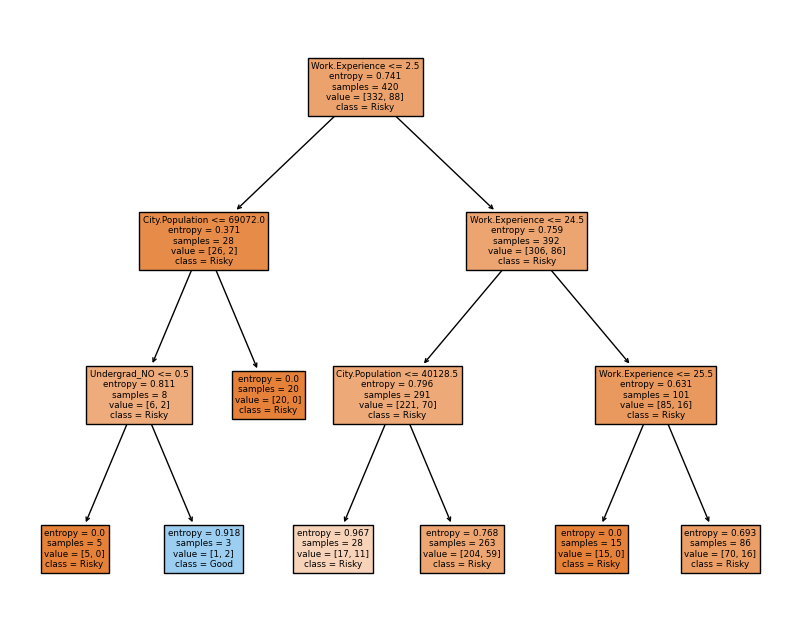

In [98]:
#visualize the decicion score 
plt.figure(figsize=(10,8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Risky', 'Good'])
plt.show()


In [99]:

# Example new data
new_data = pd.DataFrame({
    'Undergrad_YES': [0],
    'Undergrad_NO': [1],
    'Marital.Status_Married': [1],
    'Marital.Status_Divorced': [0],
    'Marital.Status_Single': [0],
    'Taxable.Income': [40000],
    'Work.Experience': [10],
    'Urban_YES': [1],
    'Urban_NO': [0]
})
    


In [100]:
new_data

,Undergrad_YES,Undergrad_NO,Marital.Status_Married,Marital.Status_Divorced,Marital.Status_Single,Taxable.Income,Work.Experience,Urban_YES,Urban_NO
0,0,1,1,0,0,40000,10,1,0


In [101]:
new_data

,Undergrad_YES,Undergrad_NO,Marital.Status_Married,Marital.Status_Divorced,Marital.Status_Single,Taxable.Income,Work.Experience,Urban_YES,Urban_NO
0,0,1,1,0,0,40000,10,1,0


In [102]:
# Preprocess new data
new_data['Taxable.Income'] = pd.cut(new_data['Taxable.Income'], bins=[0,30000, np.inf], labels=['Risky', 'Good'])

new_data = new_data.reindex(columns=X.columns, fill_value=0)

In [103]:
# Make prediction
prediction = clf.predict(new_data)
print("Prediction for new data:", prediction)

Prediction for new data: ['Good']
